In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [232]:
df = pd.read_csv('BreastCancerData.csv')


In [233]:
print(df.isna().sum())  

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Accuracy: 0.9561

Confusion Matrix:
[[347  10]
 [ 15 197]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       357
   Malignant       0.95      0.93      0.94       212

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



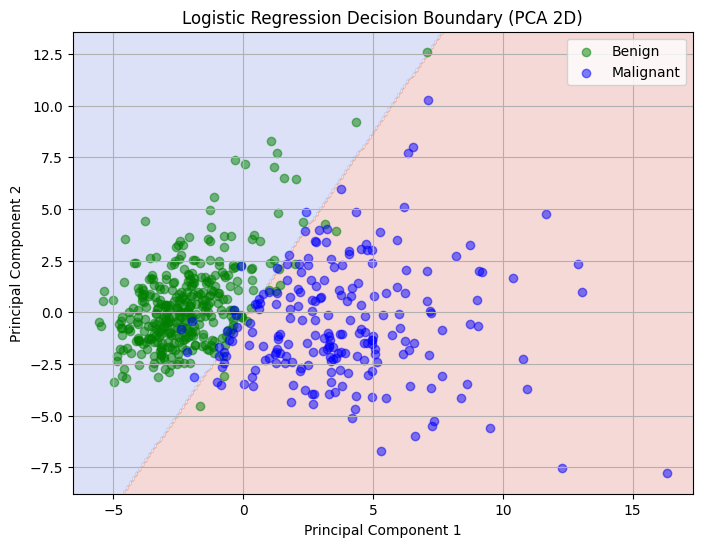

In [234]:
df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clf = LogisticRegression()
clf.fit(X_pca, y)


y_pred = clf.predict(X_pca)

accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred, target_names=['Benign', 'Malignant'])

print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Decision Boundary (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


In [235]:
pca.components_  


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [236]:
loadings = pd.DataFrame(np.abs(pca.components_), columns=X.columns, index=['PC1', 'PC2'])
print(loadings.T.sort_values(by='PC1', ascending=False).head())


                           PC1       PC2
concave points_mean   0.260854  0.034768
concavity_mean        0.258400  0.060165
concave points_worst  0.250886  0.008257
compactness_mean      0.239285  0.151892
perimeter_worst       0.236640  0.199878


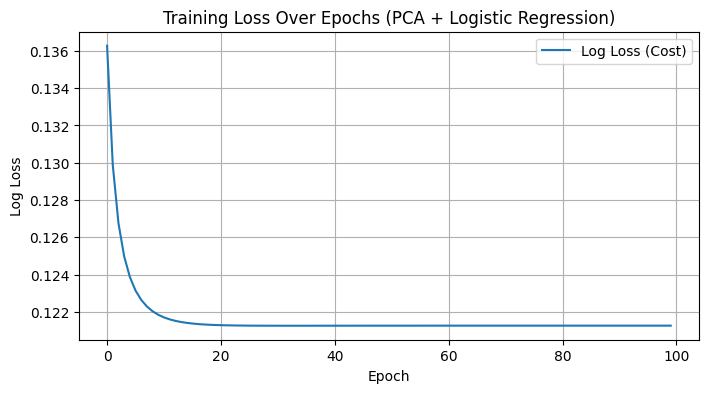

In [237]:
clf_sgd = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=42)
n_epochs = 100
losses = []

clf_sgd.partial_fit(X_pca, y, classes=np.array([0, 1]))

for epoch in range(n_epochs):
    clf_sgd.partial_fit(X_pca, y)
    y_prob = clf_sgd.predict_proba(X_pca)
    loss = log_loss(y, y_prob)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(range(n_epochs), losses, label='Log Loss (Cost)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss Over Epochs (PCA + Logistic Regression)')
plt.grid(True)
plt.legend()
plt.show()


In [238]:
svm_clf = SVC(kernel='linear')  # or try 'rbf', 'poly', etc.
svm_clf.fit(X_pca, y)

SVC(kernel='linear')

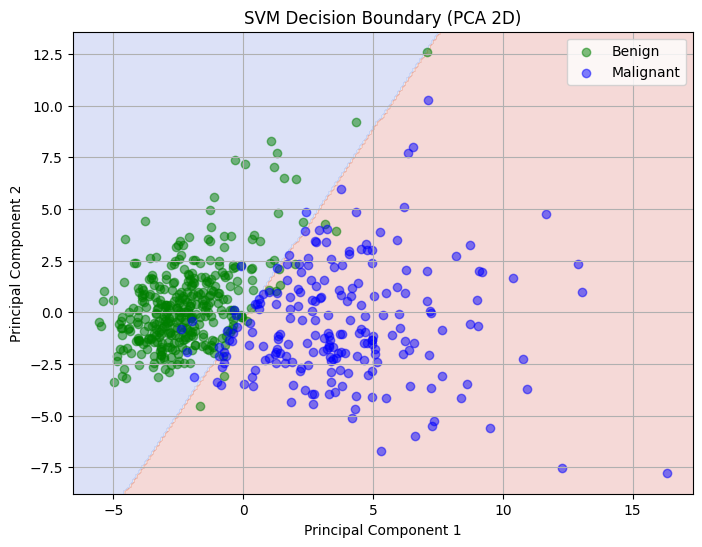

In [239]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


In [240]:
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_pca, y)

SVC(probability=True, random_state=42)

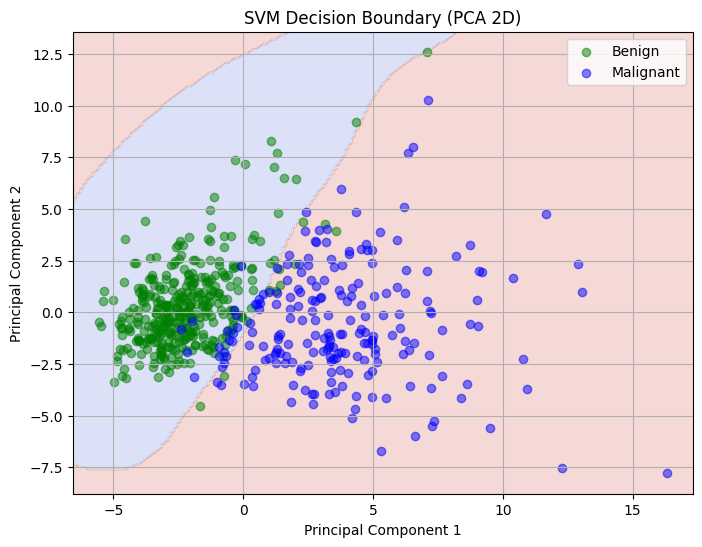

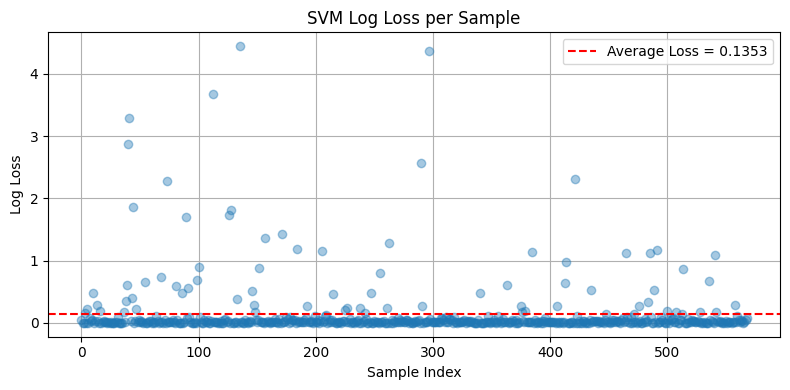

In [241]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities (SVM needs probability=True in constructor)
y_proba = svm_clf.predict_proba(X_pca)

# Compute per-sample log loss
sample_losses = -np.log(y_proba[np.arange(len(y)), y])

# Compute average loss
avg_loss = log_loss(y, y_proba)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(sample_losses, marker='o', linestyle='', alpha=0.4)
plt.axhline(avg_loss, color='red', linestyle='--', label=f'Average Loss = {avg_loss:.4f}')
plt.title("SVM Log Loss per Sample")
plt.xlabel("Sample Index")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


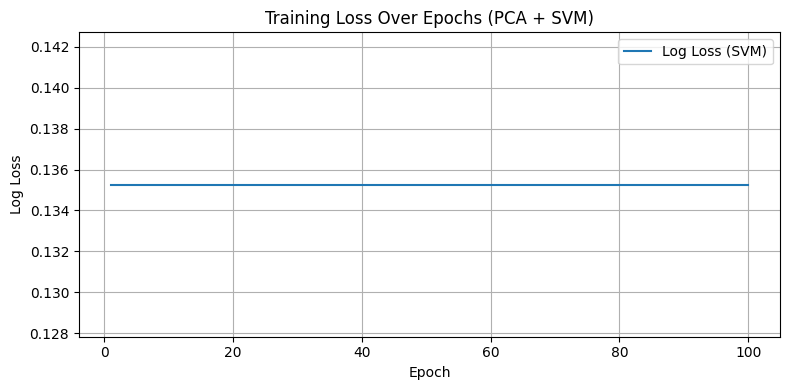

In [242]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assumes you already have:
# svm_clf = SVC(kernel='rbf', probability=True, random_state=42).fit(X_pca, y)

# Final log loss from the trained SVM
y_proba = svm_clf.predict_proba(X_pca)
avg_loss = log_loss(y, y_proba)

# Flat “epoch-style” plot for parity with your logistic graph
epochs = np.arange(1, 101)
loss_vals = np.full_like(epochs, avg_loss, dtype=float)

plt.figure(figsize=(8, 4))
plt.plot(epochs, loss_vals, label='Log Loss (SVM)')
plt.title('Training Loss Over Epochs (PCA + SVM)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [243]:
y_pred_svm = svm_clf.predict(X_pca)

accuracy = accuracy_score(y, y_pred_svm)
print(f"SVM Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_svm))

print("Classification Report:")
print(classification_report(y, y_pred_svm, target_names=['Benign', 'Malignant']))

SVM Accuracy: 0.9438
Confusion Matrix:
[[346  11]
 [ 21 191]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96       357
   Malignant       0.95      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569



In [244]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_scaled, y)
y_pred = mlp_model.predict(X_scaled)

print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


Accuracy: 0.9964850615114236
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       357
           1       1.00      0.99      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



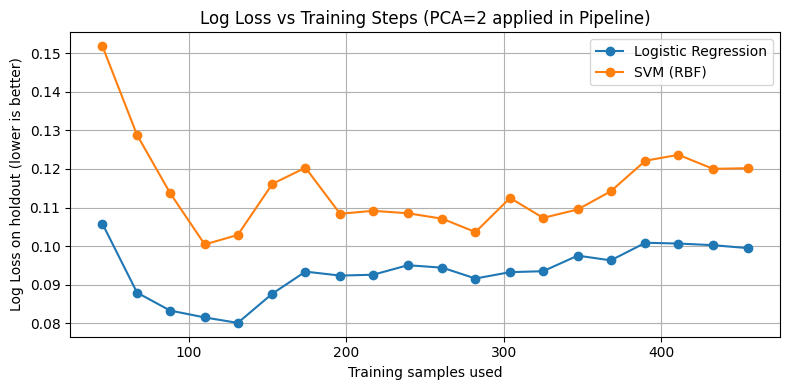

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss

# ==== Load & prep (your code, minus leakage) ====
df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Holdout split (so we can measure generalization honestly)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipelines: Standardize -> PCA(2) -> Classifier
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=42)),
    ("clf", SVC(kernel="rbf", probability=True, random_state=42))
])

# ==== Define "training steps" as increasing training size ====
steps = np.linspace(0.1, 1.0, 20)  # 10% -> 100%
rng = np.random.default_rng(42)
perm = rng.permutation(len(X_tr))   # fixed order so both models see same growth

logloss_lr, logloss_svm, n_samples = [], [], []

for frac in steps:
    m = max(2, int(len(X_tr) * frac))        # at least 2 samples
    idx = perm[:m]
    X_sub, y_sub = X_tr[idx], y_tr[idx]

    # Logistic Regression
    logreg_pipe.fit(X_sub, y_sub)
    yproba_lr = logreg_pipe.predict_proba(X_te)
    logloss_lr.append(log_loss(y_te, yproba_lr))

    # SVM (RBF)
    svm_pipe.fit(X_sub, y_sub)
    yproba_svm = svm_pipe.predict_proba(X_te)
    logloss_svm.append(log_loss(y_te, yproba_svm))

    n_samples.append(m)

# ==== Plot ====
plt.figure(figsize=(8,4))
plt.plot(n_samples, logloss_lr, marker='o', label='Logistic Regression')
plt.plot(n_samples, logloss_svm, marker='o', label='SVM (RBF)')
plt.xlabel("Training samples used")
plt.ylabel("Log Loss on holdout (lower is better)")
plt.title("Log Loss vs Training Steps (PCA=2 applied in Pipeline)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [246]:
df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_model.fit(X_scaled, y)

print("Training complete. Final loss:", nn_model.loss_)
print("Number of iterations:", nn_model.n_iter_)




Training complete. Final loss: 0.04092264753368983
Number of iterations: 325


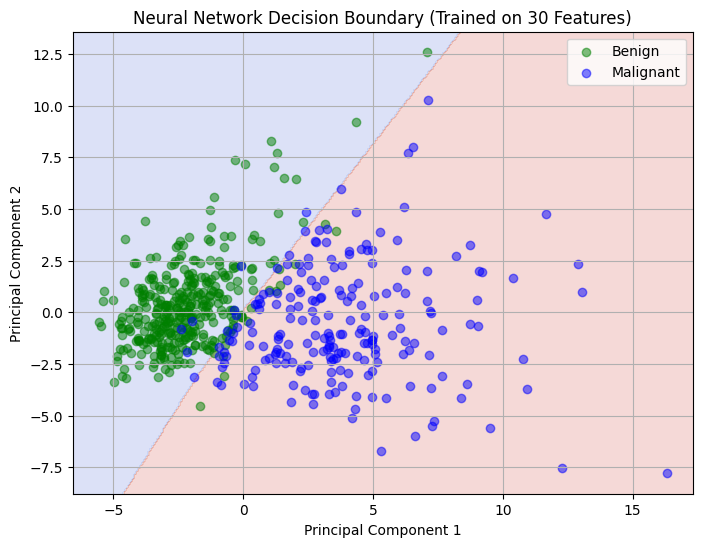

In [247]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
pca_grid = np.c_[xx.ravel(), yy.ravel()]

grid_original_space = pca.inverse_transform(pca_grid)
Z = nn_model.predict(grid_original_space).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Neural Network Decision Boundary (Trained on 30 Features)")
plt.legend()
plt.grid(True)
plt.show()

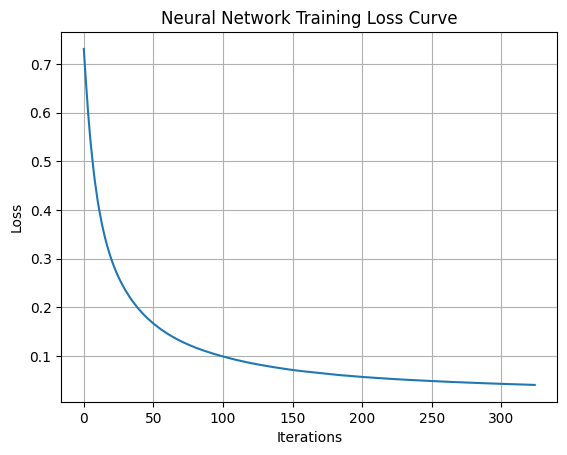

In [248]:
plt.plot(nn_model.loss_curve_)
plt.title("Neural Network Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [249]:
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)
df_num = df.select_dtypes(include=['number'])


In [250]:
dfSize = df[[ 'radius_mean', 'perimeter_mean','area_mean', 'radius_se',  'perimeter_se', 'area_se',
             'radius_worst', 'perimeter_worst', 'area_worst', ]].copy()

In [251]:
dfShape = df[[ 
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'compactness_se', 'concavity_se', 'concave points_se','compactness_worst', 
    'concavity_worst', 'concave points_worst']].copy()


In [252]:
dfTexture = df[[ 
    'texture_mean', 'texture_se', 'texture_worst',  
      'smoothness_mean', 'smoothness_se', 'smoothness_worst']].copy()

In [253]:
dfSymmetry = df[[ 
    'symmetry_mean', 'fractal_dimension_mean',
    'symmetry_se', 'fractal_dimension_se','symmetry_worst', 'fractal_dimension_worst']].copy()


In [254]:
df.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
df_num.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
dfSize.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
dfShape.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
dfTexture.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
dfSymmetry.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
df.columns

Index(['Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius Se', 'Texture Se', 'Perimeter Se', 'Area Se', 'Smoothness Se',
       'Compactness Se', 'Concavity Se', 'Concave Points Se', 'Symmetry Se',
       'Fractal Dimension Se', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst'],
      dtype='object')

Accuracy: 1.0000

Confusion Matrix:
[[357   0]
 [  0 212]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

Log Loss (Cost): 0.0320


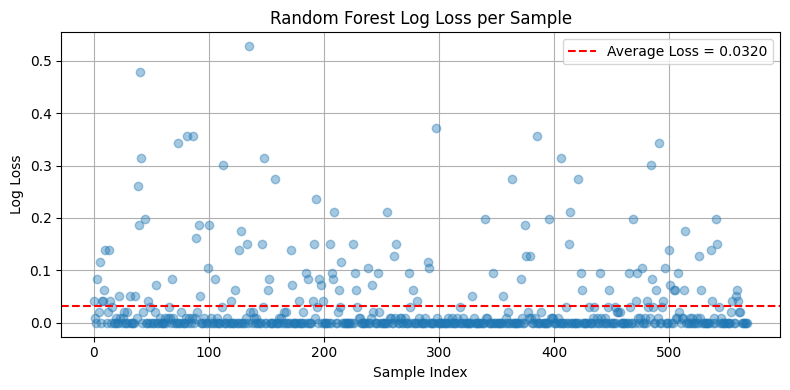

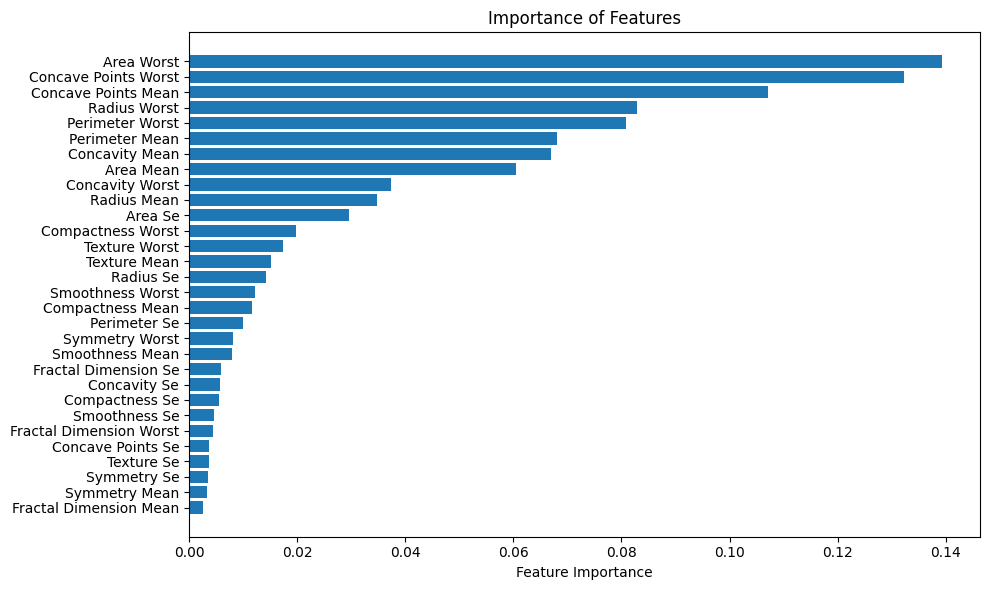

In [255]:
df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)


df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})


X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis'].values



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rForest = RandomForestClassifier(n_estimators=100, random_state=42)
rForest.fit(X_scaled, y)

y_pred = rForest.predict(X_scaled)
y_proba = rForest.predict_proba(X_scaled)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

loss = log_loss(y, y_proba)
print(f"Log Loss (Cost): {loss:.4f}")

sample_losses = -np.log(y_proba[np.arange(len(y)), y])

plt.figure(figsize=(8, 4))
plt.plot(sample_losses, marker='o', linestyle='', alpha=0.4)
plt.axhline(np.mean(sample_losses), color='red', linestyle='--', label=f'Average Loss = {loss:.4f}')
plt.title("Random Forest Log Loss per Sample")
plt.xlabel("Sample Index")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rForest.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Importance of Features')
plt.tight_layout()
plt.show()

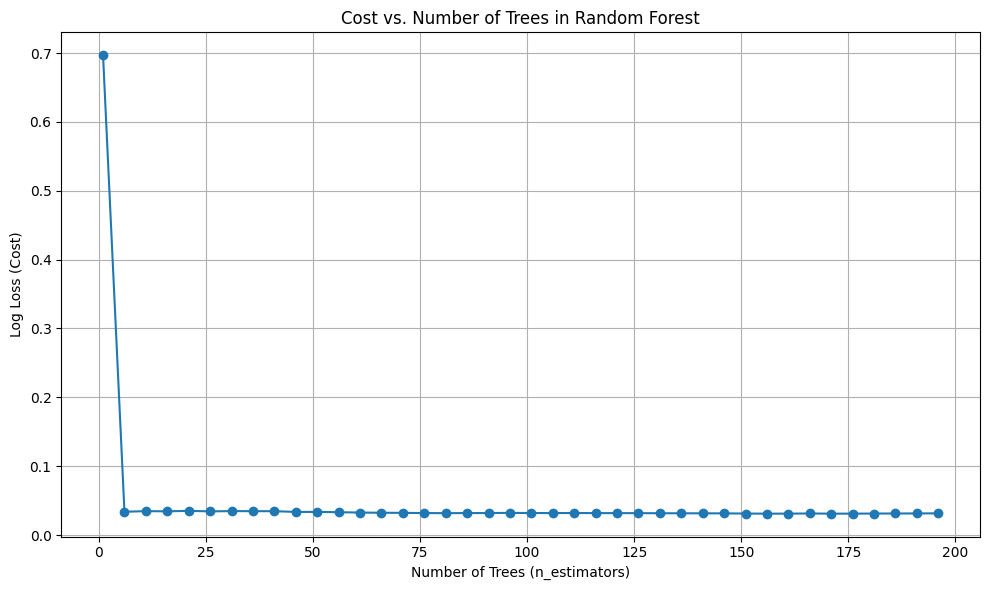

In [256]:
df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

estimators = list(range(1, 201, 5))  
log_losses = []

for n in estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_scaled, y)
    y_proba = model.predict_proba(X_scaled)
    loss = log_loss(y, y_proba)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(estimators, log_losses, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Log Loss (Cost)")
plt.title("Cost vs. Number of Trees in Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


In [257]:
df = pd.read_csv('BreastCancerData.csv')

In [258]:
df.shape

(569, 33)

In [259]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [260]:
df.head(30)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M       17.990         10.38          122.80     1001.0   
1     842517         M       20.570         17.77          132.90     1326.0   
2   84300903         M       19.690         21.25          130.00     1203.0   
3   84348301         M       11.420         20.38           77.58      386.1   
4   84358402         M       20.290         14.34          135.10     1297.0   
5     843786         M       12.450         15.70           82.57      477.1   
6     844359         M       18.250         19.98          119.60     1040.0   
7   84458202         M       13.710         20.83           90.20      577.9   
8     844981         M       13.000         21.82           87.50      519.8   
9   84501001         M       12.460         24.04           83.97      475.9   
10    845636         M       16.020         23.24          102.70      797.8   
11  84610002         M       15.780         17.89          103.60      781.0   
12    846226         M       19.170         24.80          132.40     1123.0   
13    846381         M       15.850         23.95          103.70      782.7   
14  84667401         M       13.730         22.61           93.60      578.3   
15  84799002         M       14.540         27.54           96.73      658.8   
16    848406         M       14.680         20.13           94.74      684.5   
17  84862001         M       16.130         20.68          108.10      798.8   
18    849014         M       19.810         22.15          130.00     1260.0   
19   8510426         B       13.540         14.36           87.46      566.3   
20   8510653         B       13.080         15.71           85.63      520.0   
21   8510824         B        9.504         12.44           60.34      273.9   
22   8511133         M       15.340         14.26          102.50      704.4   
23    851509         M       21.160         23.04          137.20     1404.0   
24    852552         M       16.650         21.38          110.00      904.6   
25    852631         M       17.140         16.40          116.00      912.7   
26    852763         M       14.580         21.53           97.41      644.8   
27    852781         M       18.610         20.25          122.10     1094.0   
28    852973         M       15.300         25.27          102.40      732.4   
29    853201         M       17.570         15.05          115.00      955.1   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0

In [261]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [262]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

<Axes: >

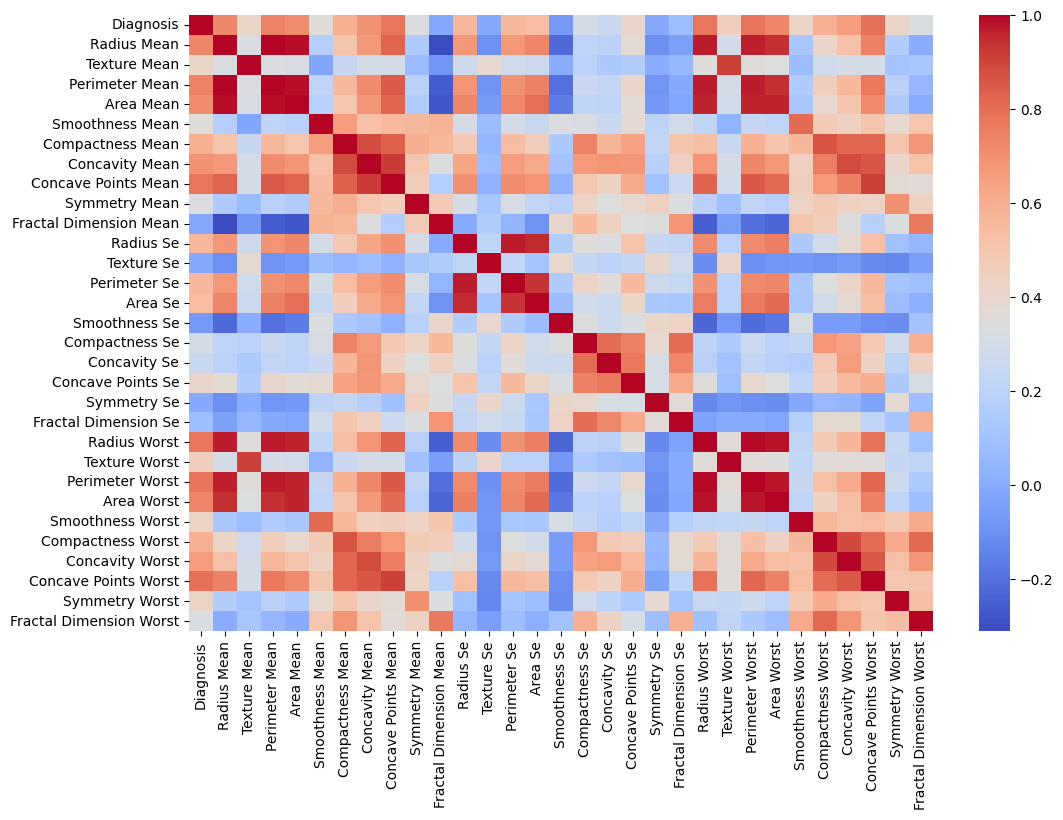

In [263]:
corr = df_num.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False,)


In [264]:
feature_cols = [
    'Radius Mean','Perimeter Mean','Area Mean',
    'Radius Se','Perimeter Se','Area Se',
    'Radius Worst','Perimeter Worst','Area Worst'
]

label_col = 'Diagnosis'
df_pair = df[feature_cols + [label_col]].copy()

if df_pair[label_col].dtype == 'O':
    df_pair['diag_label'] = df_pair[label_col].map({'M':'Malignant','B':'Benign'})
else:
    df_pair['diag_label'] = df_pair[label_col].map({1:'Malignant',0:'Benign'})

sns.pairplot(df_pair, vars=feature_cols, hue='diag_label', diag_kind='kde', corner=True)
plt.show()
feature_cols = [
    'Radius Mean','Perimeter Mean','Area Mean',
    'Radius Se','Perimeter Se','Area Se',
    'Radius Worst','Perimeter Worst','Area Worst'
]

label_col = 'Diagnosis'
df_pair = df[feature_cols + [label_col]].copy()

if df_pair[label_col].dtype == 'O':
    df_pair['diag_label'] = df_pair[label_col].map({'M':'Malignant','B':'Benign'})
else:
    df_pair['diag_label'] = df_pair[label_col].map({1:'Malignant',0:'Benign'})

sns.pairplot(df_pair, vars=feature_cols, hue='diag_label', diag_kind='kde', corner=True)
plt.show()


KeyError: "None of [Index(['Radius Mean', 'Perimeter Mean', 'Area Mean', 'Radius Se',\n       'Perimeter Se', 'Area Se', 'Radius Worst', 'Perimeter Worst',\n       'Area Worst', 'Diagnosis'],\n      dtype='object')] are in the [columns]"

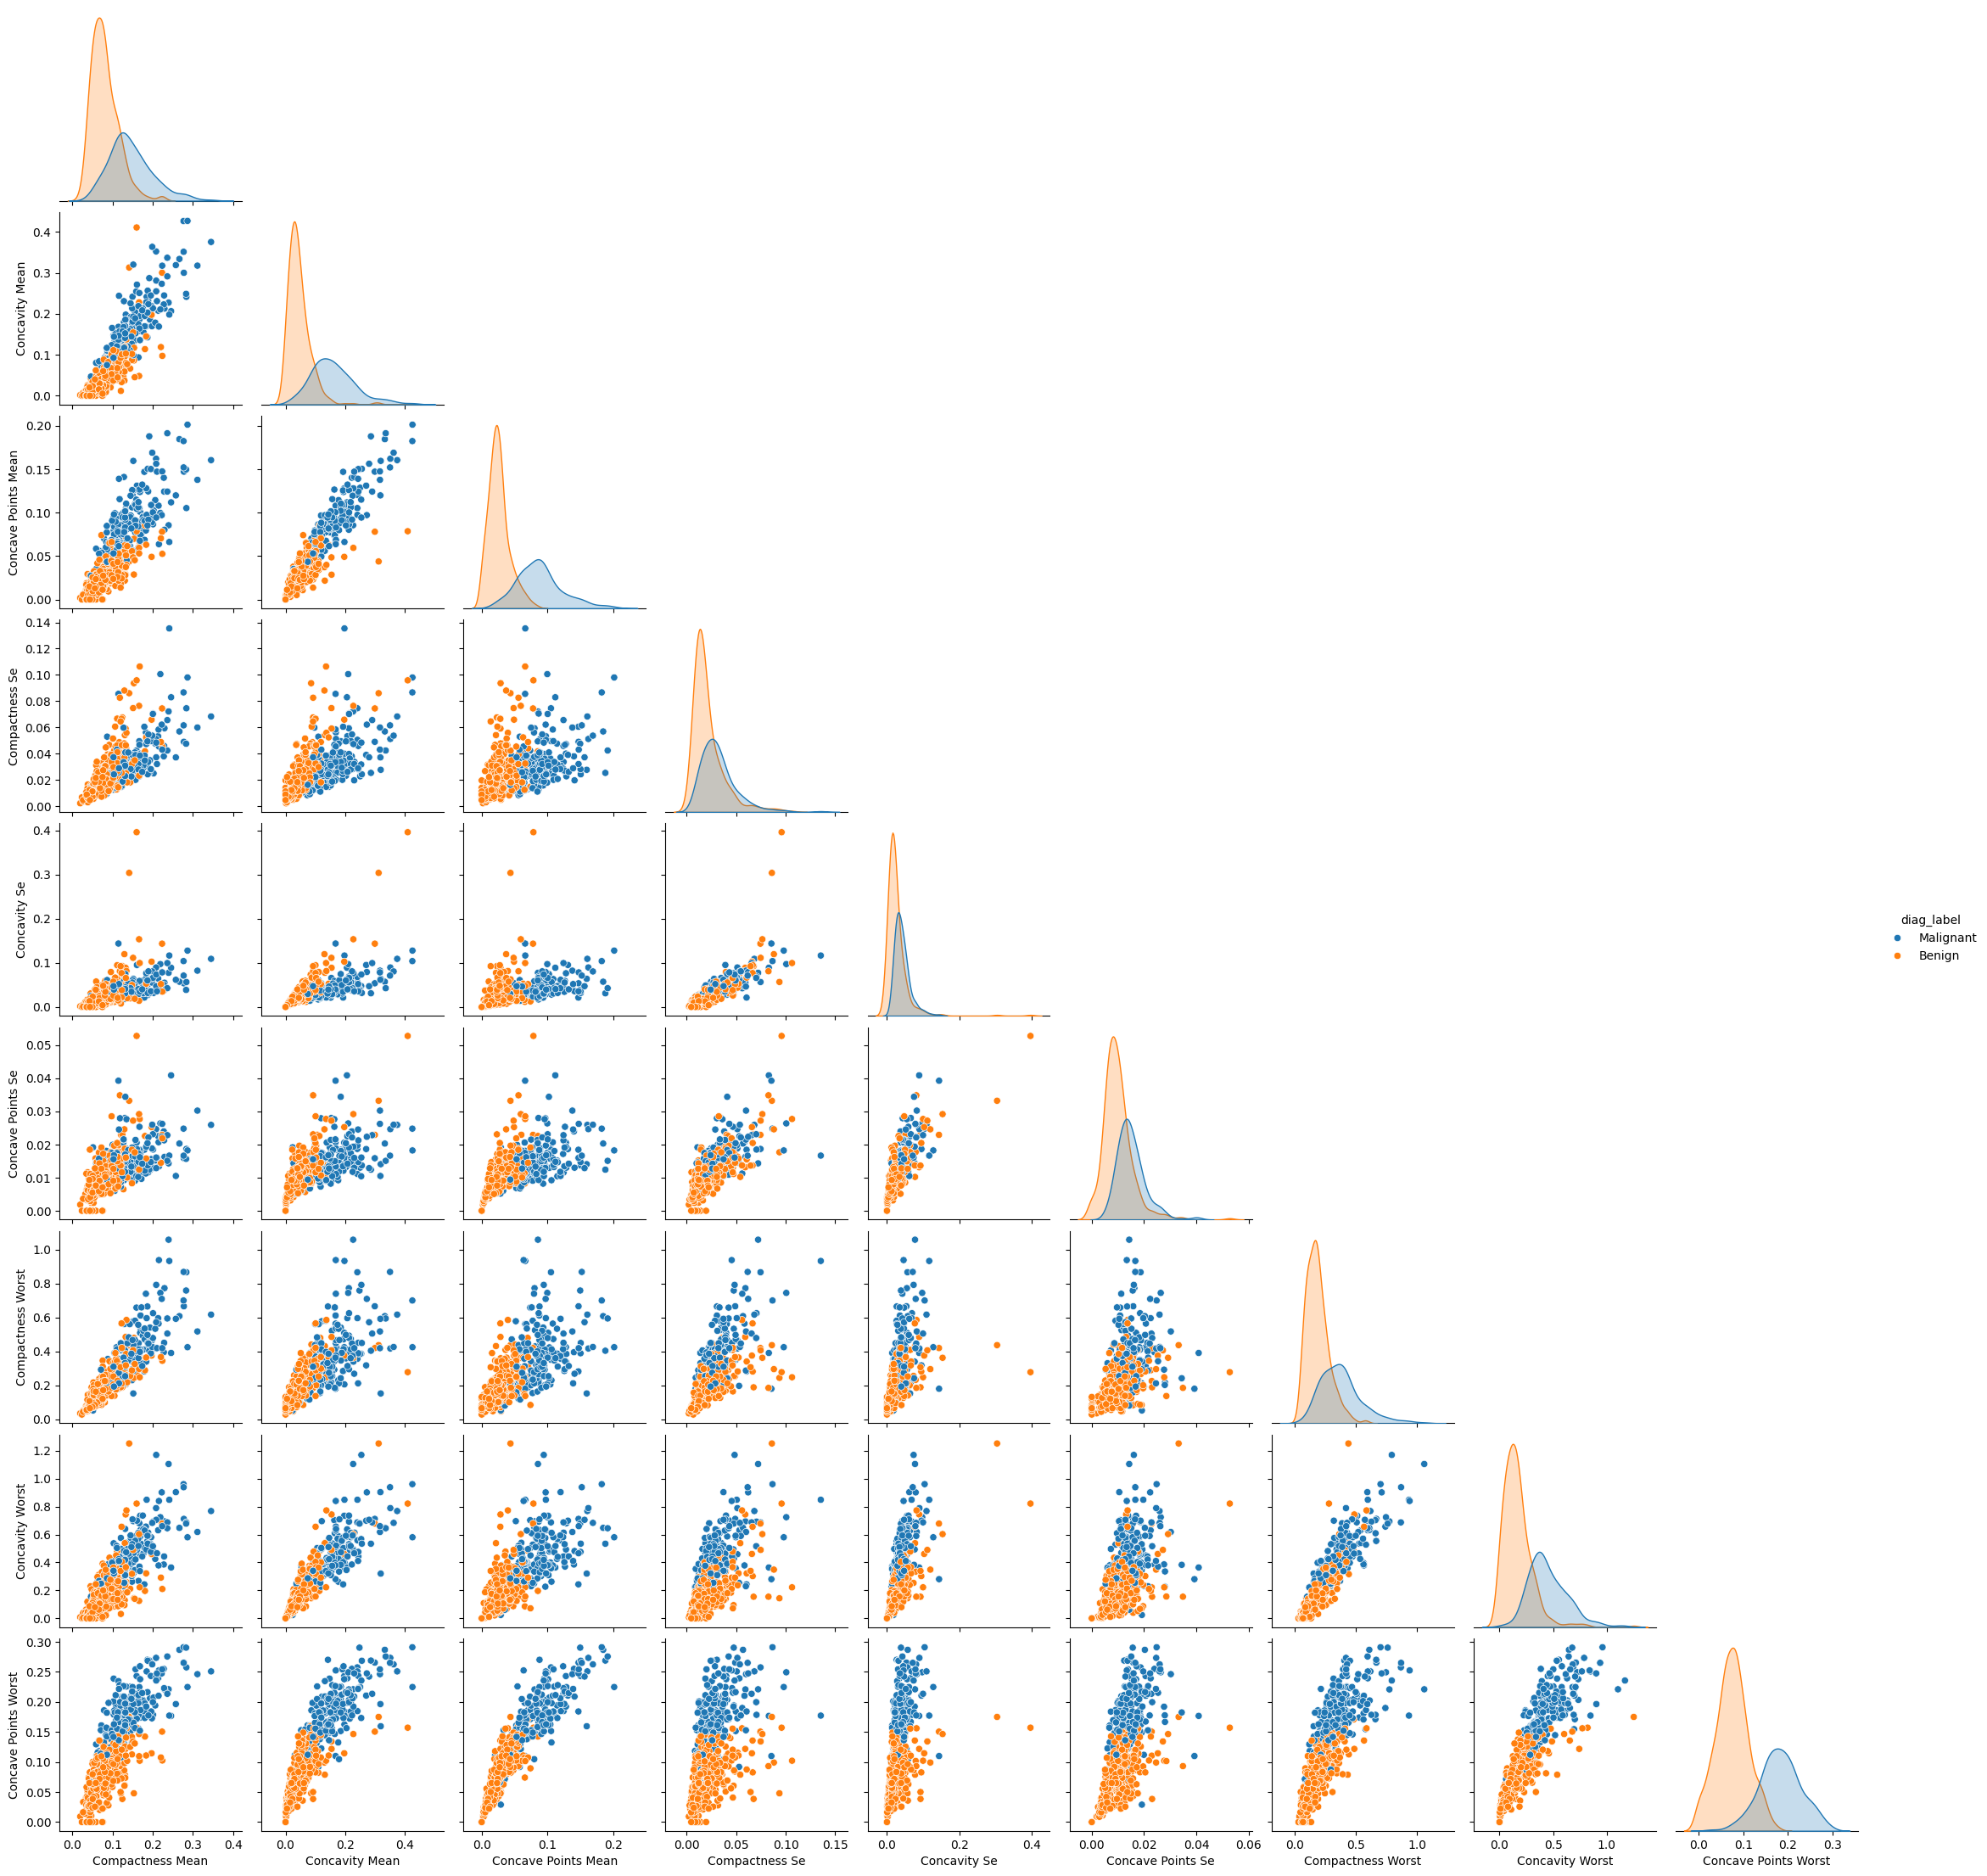

In [ ]:
feature_cols = [
    'Compactness Mean','Concavity Mean','Concave Points Mean',
    'Compactness Se','Concavity Se','Concave Points Se',
    'Compactness Worst','Concavity Worst','Concave Points Worst'
]

label_col = 'Diagnosis' 

df_pair = df[feature_cols + [label_col]].copy()

if df_pair[label_col].dtype == 'O':
    df_pair['diag_label'] = df_pair[label_col].map({'M':'Malignant','B':'Benign'})
else:
    df_pair['diag_label'] = df_pair[label_col].map({1:'Malignant',0:'Benign'})

sns.pairplot(df_pair, vars=feature_cols, hue='diag_label', diag_kind='kde', corner=True)
plt.show()


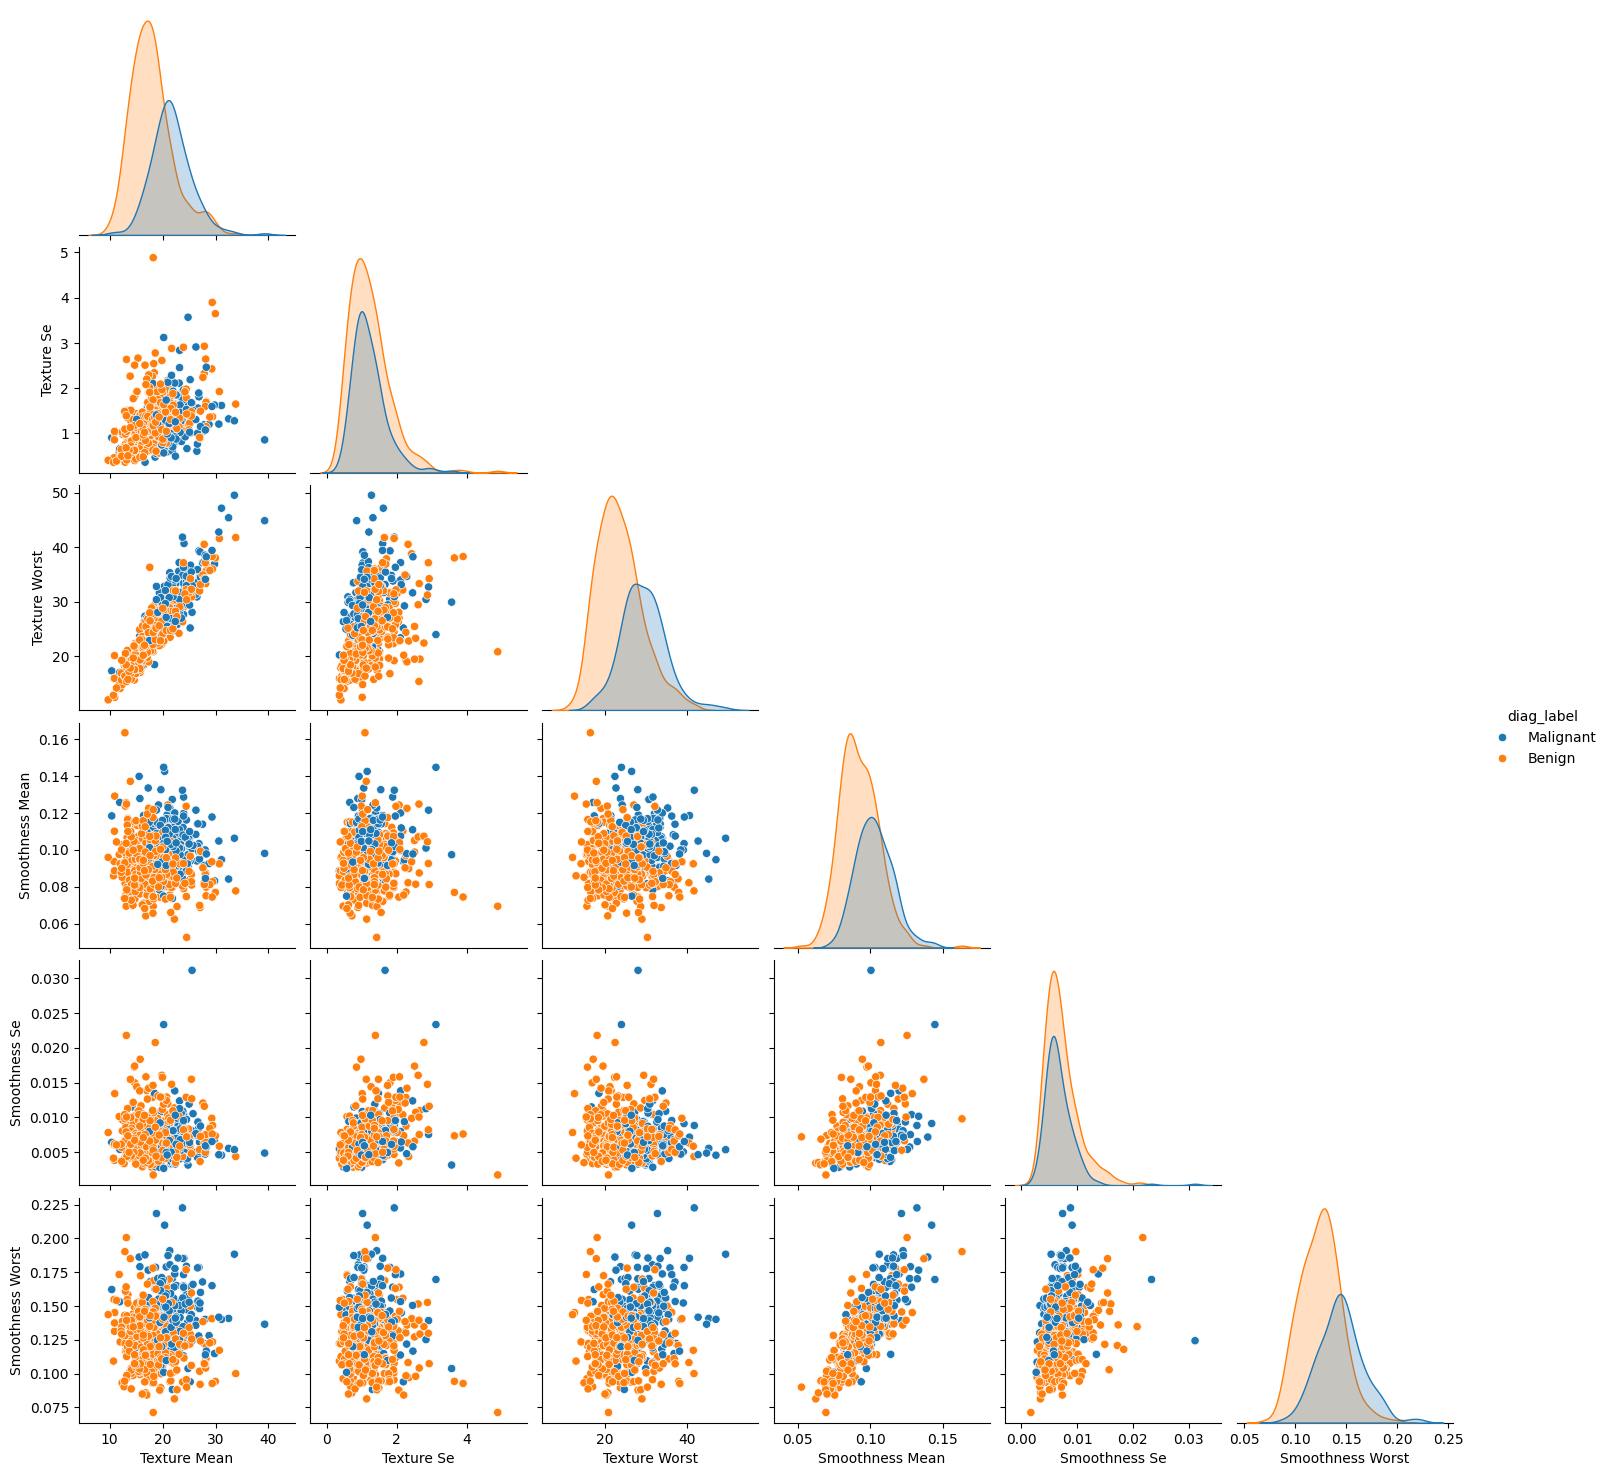

In [ ]:
feature_cols = [
    'Texture Mean','Texture Se','Texture Worst',
    'Smoothness Mean','Smoothness Se','Smoothness Worst'
]

label_col = 'Diagnosis' 

df_pair = df[feature_cols + [label_col]].copy()

if df_pair[label_col].dtype == 'O':
    df_pair['diag_label'] = df_pair[label_col].map({'M':'Malignant','B':'Benign'})
else:
    df_pair['diag_label'] = df_pair[label_col].map({1:'Malignant',0:'Benign'})

sns.pairplot(df_pair, vars=feature_cols, hue='diag_label', diag_kind='kde', corner=True)
plt.show()


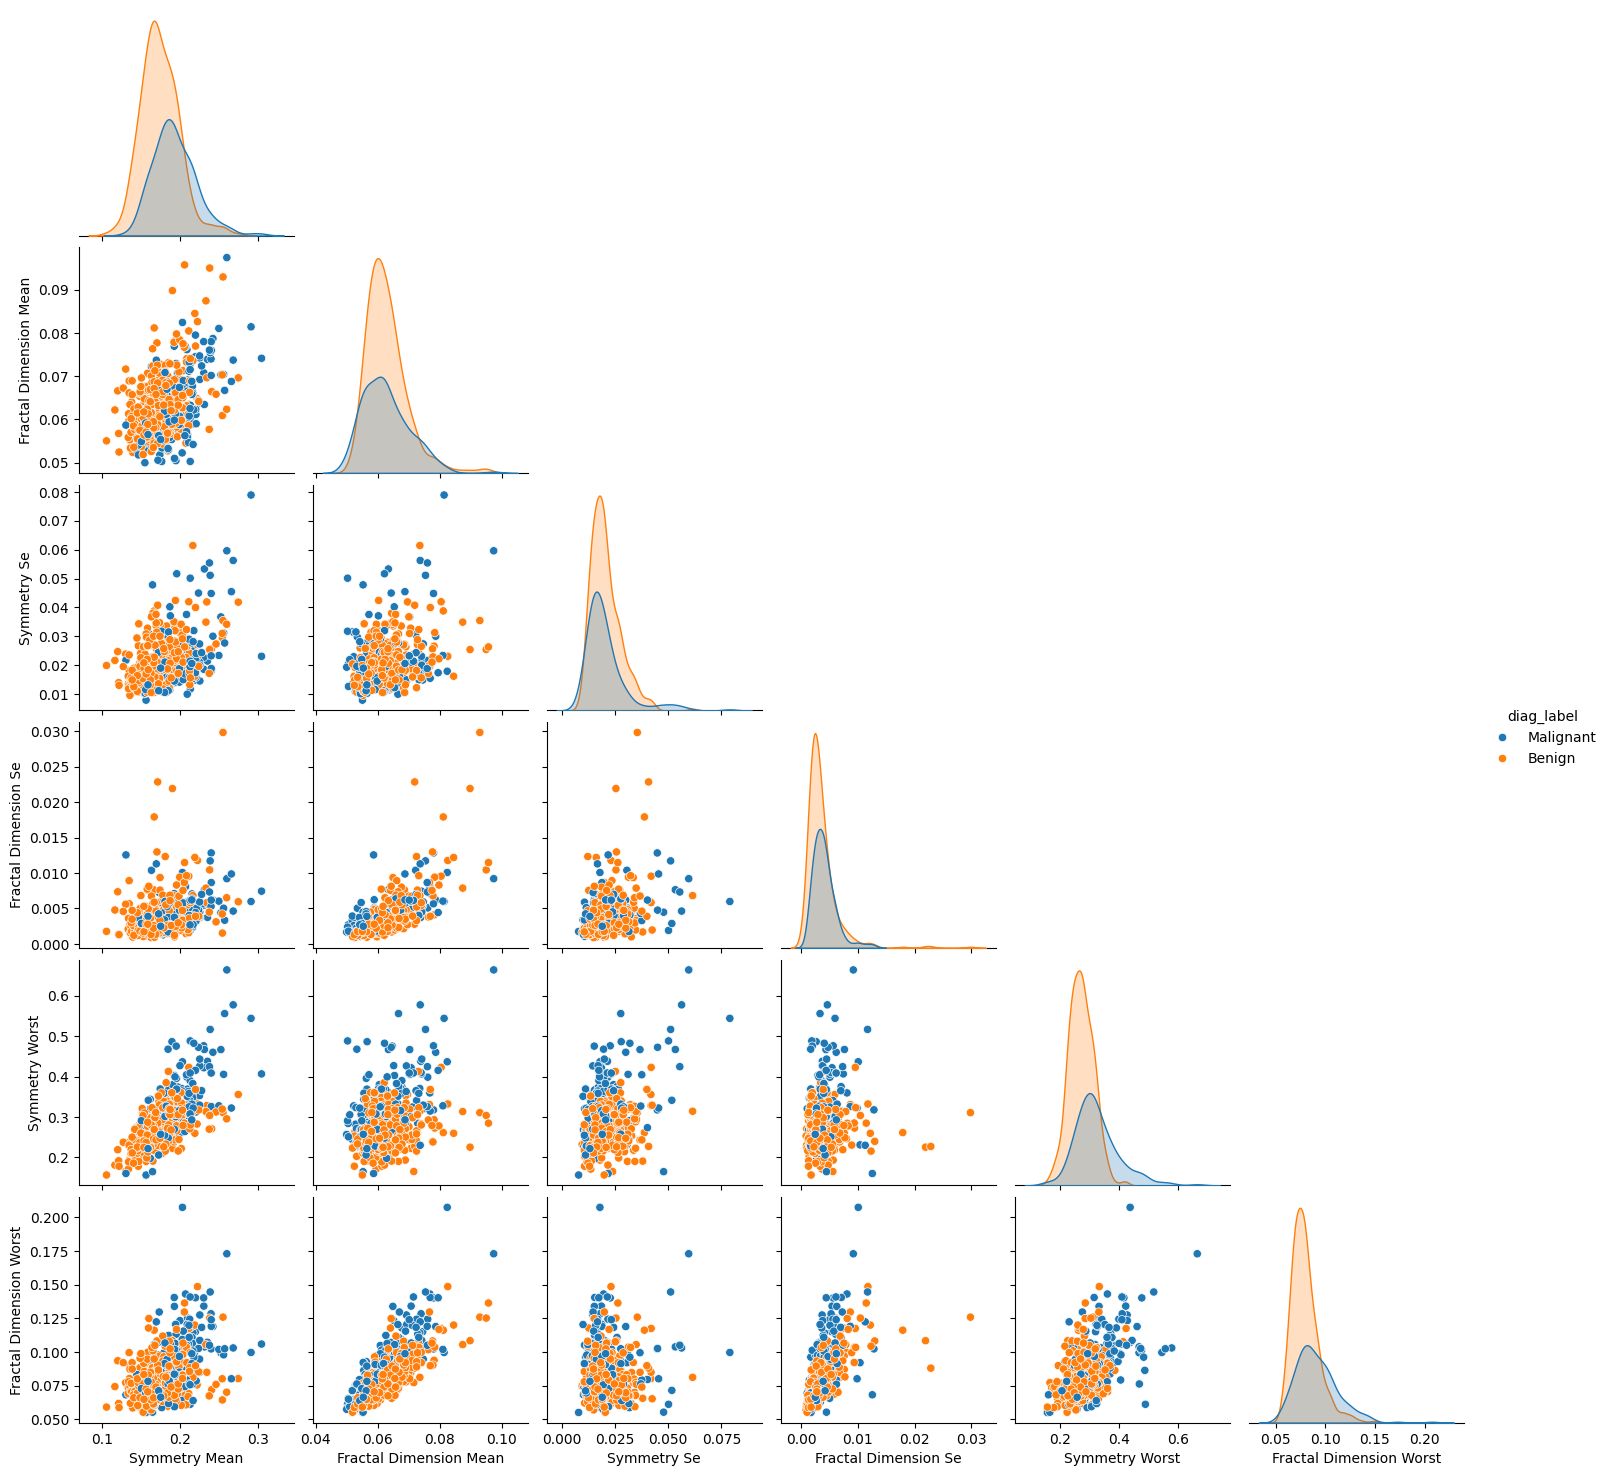

In [ ]:
feature_cols = [
    'Symmetry Mean','Fractal Dimension Mean',
    'Symmetry Se','Fractal Dimension Se',
    'Symmetry Worst','Fractal Dimension Worst'
]

label_col = 'Diagnosis'  

df_pair = df[feature_cols + [label_col]].copy()

if df_pair[label_col].dtype == 'O':
    df_pair['diag_label'] = df_pair[label_col].map({'M':'Malignant','B':'Benign'})
else:
    df_pair['diag_label'] = df_pair[label_col].map({1:'Malignant',0:'Benign'})

sns.pairplot(df_pair, vars=feature_cols, hue='diag_label', diag_kind='kde', corner=True)
plt.show()


Text(0.5, 1.0, 'Diagnosis Counts')

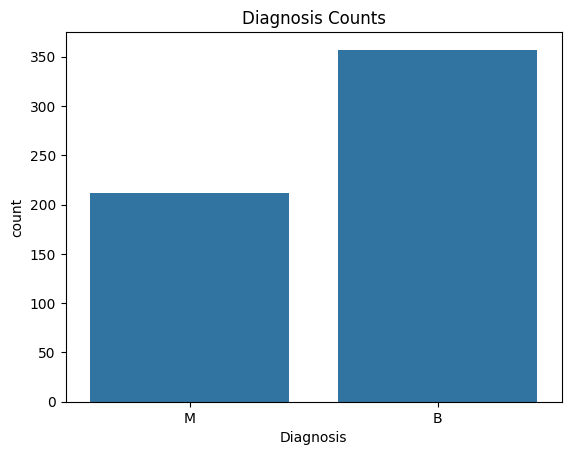

In [ ]:
sns.countplot(x='Diagnosis', data=df)
plt.title("Diagnosis Counts")


<Axes: xlabel='Diagnosis', ylabel='Concave Points Mean'>

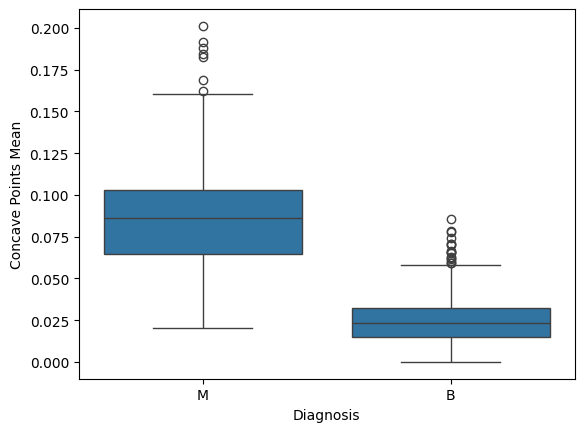

In [ ]:

sns.boxplot(x='Diagnosis', y='Concave Points Mean', data=df)


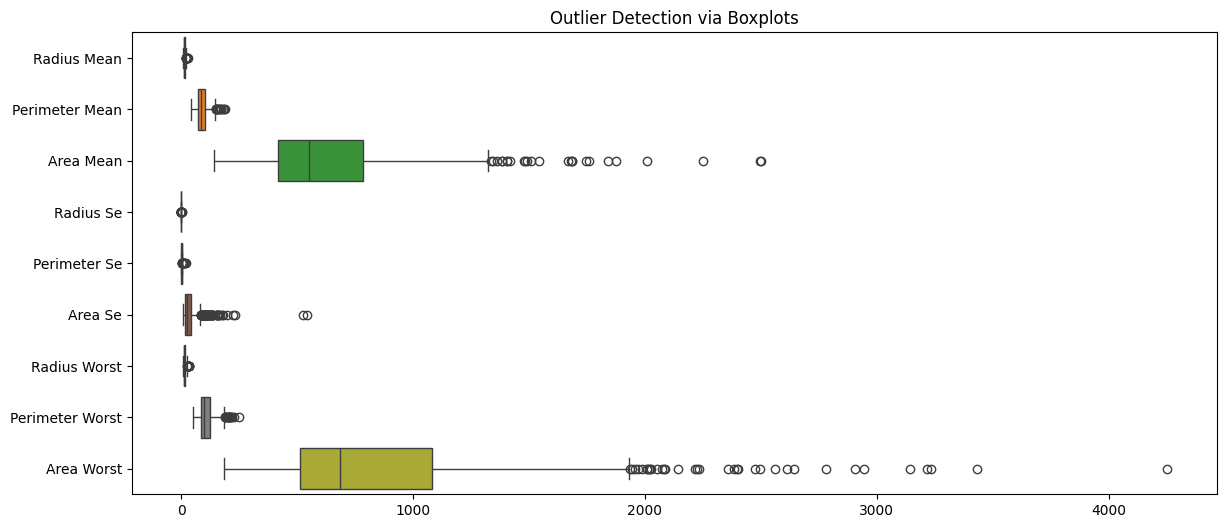

In [ ]:
features_to_check = [
'Radius Mean', 'Perimeter Mean', 'Area Mean',
'Radius Se', 'Perimeter Se', 'Area Se',
'Radius Worst', 'Perimeter Worst', 'Area Worst'

]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_to_check], orient='h')
plt.title("Outlier Detection via Boxplots")
plt.show()

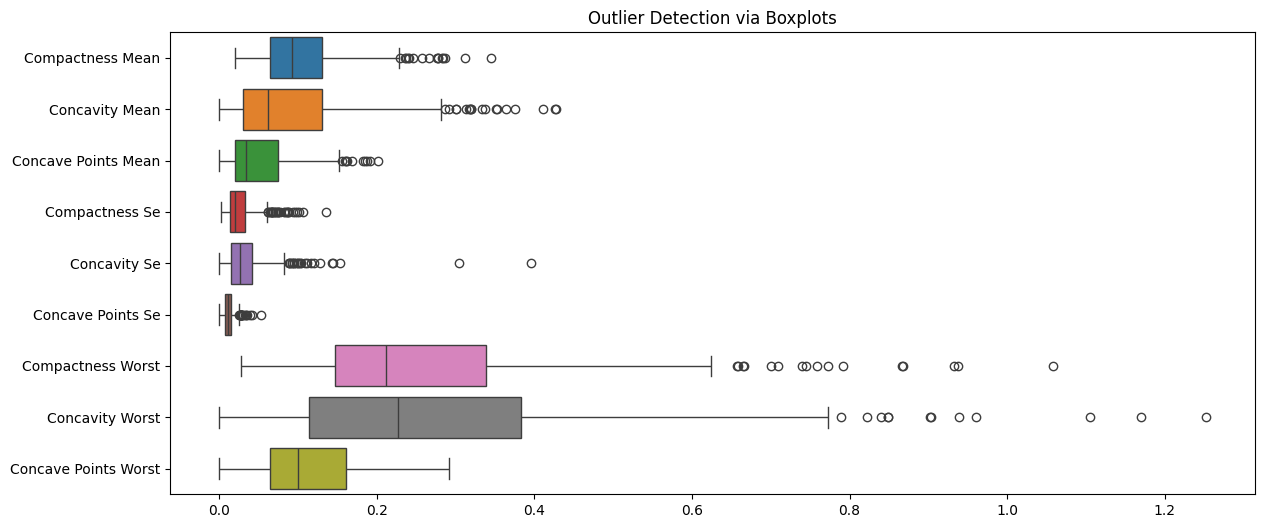

In [ ]:
features_to_check = [
'Compactness Mean', 'Concavity Mean', 'Concave Points Mean',
'Compactness Se', 'Concavity Se', 'Concave Points Se',
'Compactness Worst', 'Concavity Worst', 'Concave Points Worst'


]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_to_check], orient='h')
plt.title("Outlier Detection via Boxplots")
plt.show()

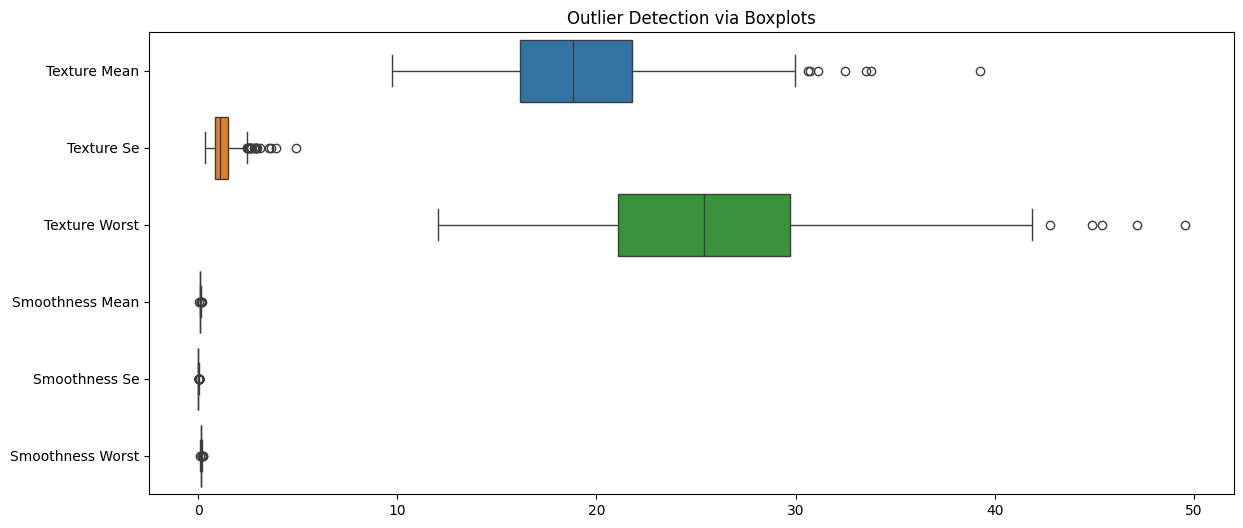

In [ ]:
features_to_check = [
'Texture Mean', 'Texture Se', 'Texture Worst',
'Smoothness Mean', 'Smoothness Se', 'Smoothness Worst'



]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_to_check], orient='h')
plt.title("Outlier Detection via Boxplots")
plt.show()

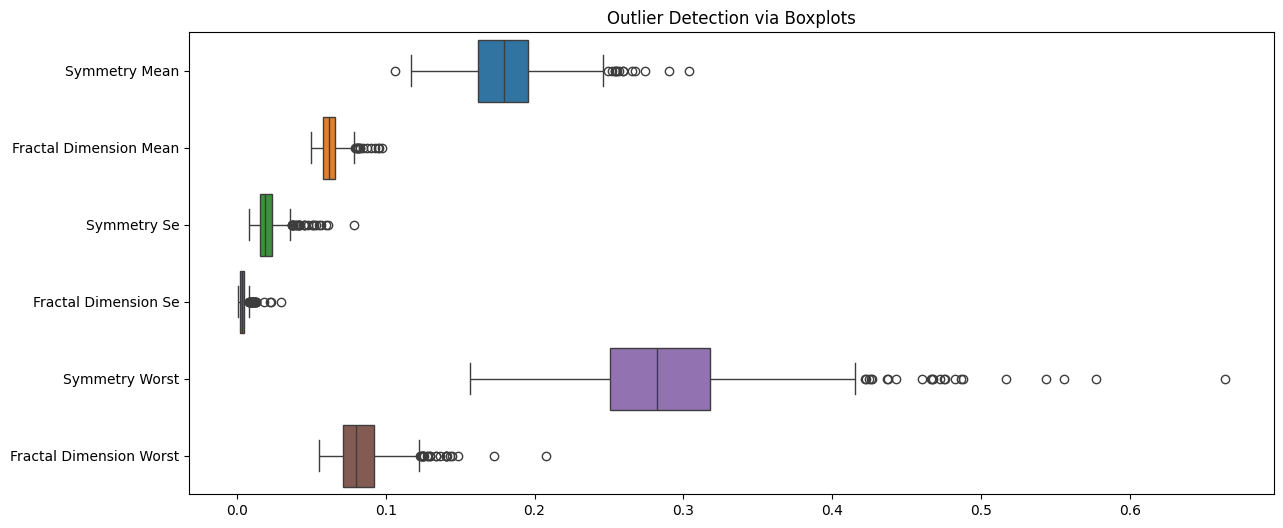

In [ ]:
features_to_check = [
'Symmetry Mean', 'Fractal Dimension Mean',
'Symmetry Se', 'Fractal Dimension Se',
'Symmetry Worst', 'Fractal Dimension Worst'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_to_check], orient='h')
plt.title("Outlier Detection via Boxplots")
plt.show()

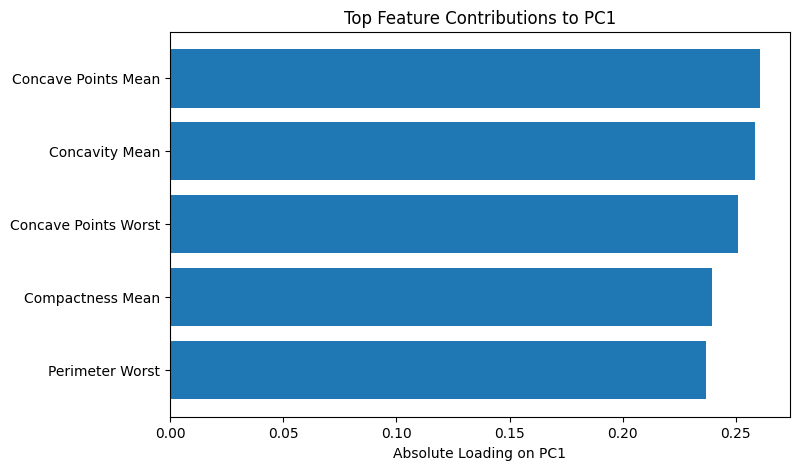

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

loadings = pd.DataFrame({
    'Feature': ['Concave Points Mean', 'Concavity Mean', 'Concave Points Worst',
                'Compactness Mean', 'Perimeter Worst'],
    'PC1': [0.260854, 0.258400, 0.250886, 0.239285, 0.236640],
    'PC2': [0.034768, 0.060165, 0.008257, 0.151892, 0.199878]
})

plt.figure(figsize=(8,5))
plt.barh(loadings['Feature'], loadings['PC1'].abs())
plt.xlabel('Absolute Loading on PC1')
plt.title('Top Feature Contributions to PC1')
plt.gca().invert_yaxis()
plt.show()


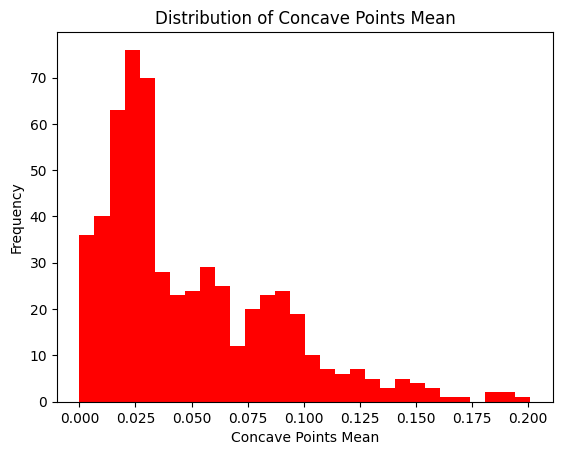

In [ ]:
plt.hist(df['Concave Points Mean'], bins = 30, color = 'red')
plt.title('Distribution of Concave Points Mean')
plt.xlabel('Concave Points Mean')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius Se', 'Texture Se', 'Perimeter Se', 'Area Se', 'Smoothness Se',
       'Compactness Se', 'Concavity Se', 'Concave Points Se', 'Symmetry Se',
       'Fractal Dimension Se', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst'],
      dtype='object')

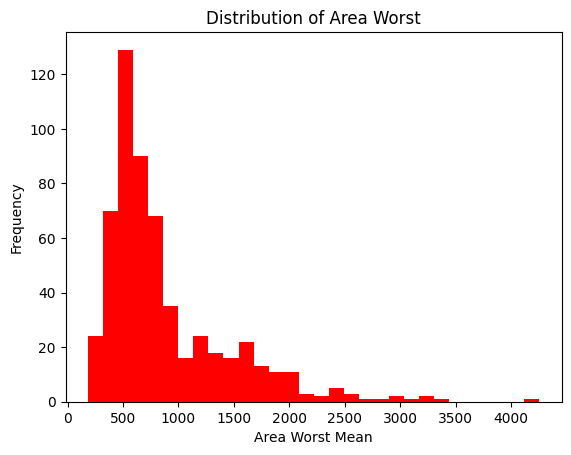

In [ ]:
plt.hist(df['Area Worst'], bins = 30, color='red')
plt.title('Distribution of Area Worst')
plt.xlabel('Area Worst Mean')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 1). Does the mean size of a tumor affect the classification of a tumor?
# # 2)  do measures of mean tumor shape have more influence on diagnosis than mean size-related features?
# # 3)  Which features are most important for tumor type classification?

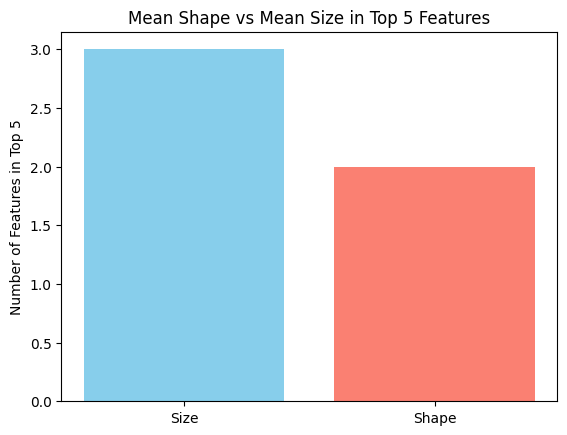

In [ ]:
top_n = 5
top_feats = imp_df.head(top_n).index

group_counts = {
    'Size': sum(f in size_features for f in top_feats),
    'Shape': sum(f in shape_features for f in top_feats)
}

plt.bar(group_counts.keys(), group_counts.values(), color=['skyblue','salmon'])
plt.ylabel(f"Number of Features in Top {top_n}")
plt.title(f"Mean Shape vs Mean Size in Top {top_n} Features")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(columns=['Diagnosis','Id','Unnamed: 32'], errors='ignore').select_dtypes(include='number')
y = df['Diagnosis'].map({'B':0,'M':1})

rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X, y)

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top Features – Random Forest')
plt.tight_layout()
plt.show()



KeyError: 'Diagnosis'

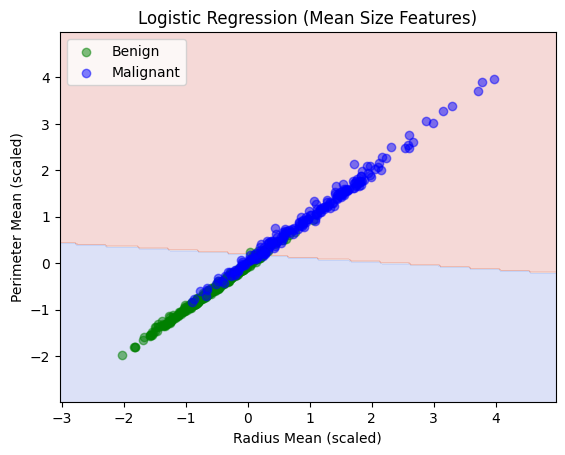

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('BreastCancerData.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df[['radius_mean', 'perimeter_mean']]
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LogisticRegression()
lr.fit(X_scaled, y)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], c='green', label='Benign', alpha=0.5)
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], c='blue', label='Malignant', alpha=0.5)
plt.xlabel('Radius Mean (scaled)')
plt.ylabel('Perimeter Mean (scaled)')
plt.title('Logistic Regression (Mean Size Features)')
plt.legend()
plt.show()


<Axes: title={'center': 'Correlation Heatmap of SE Features'}>

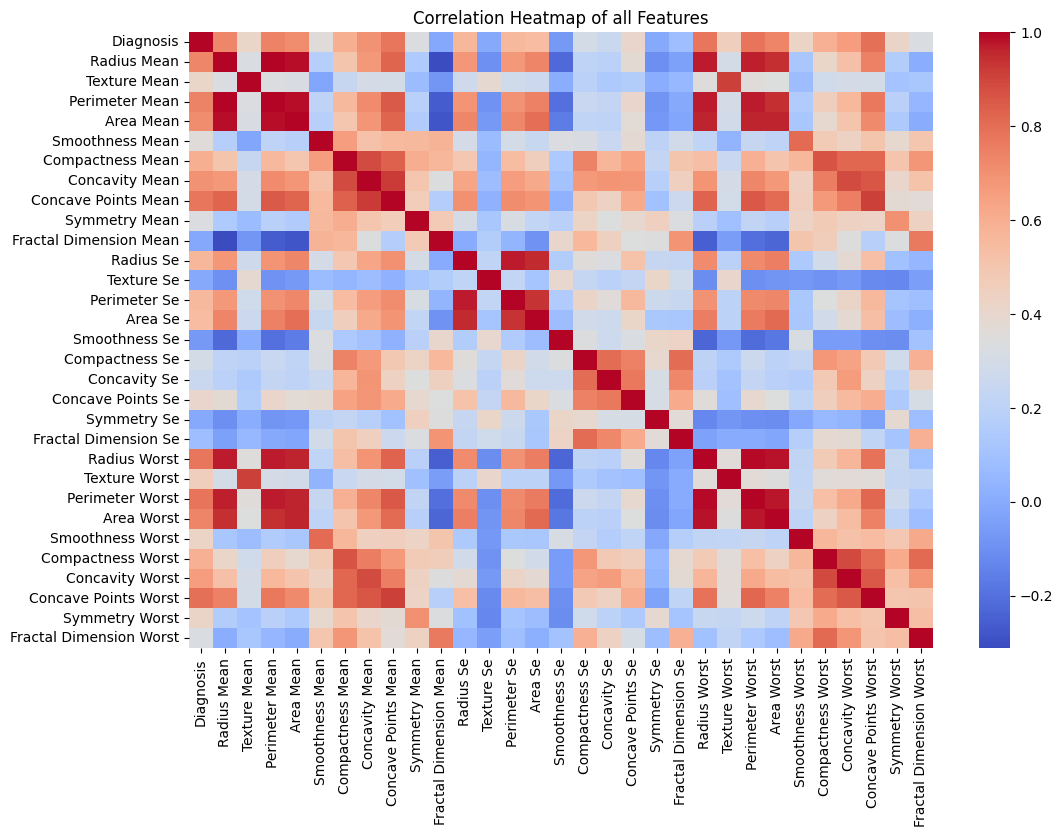

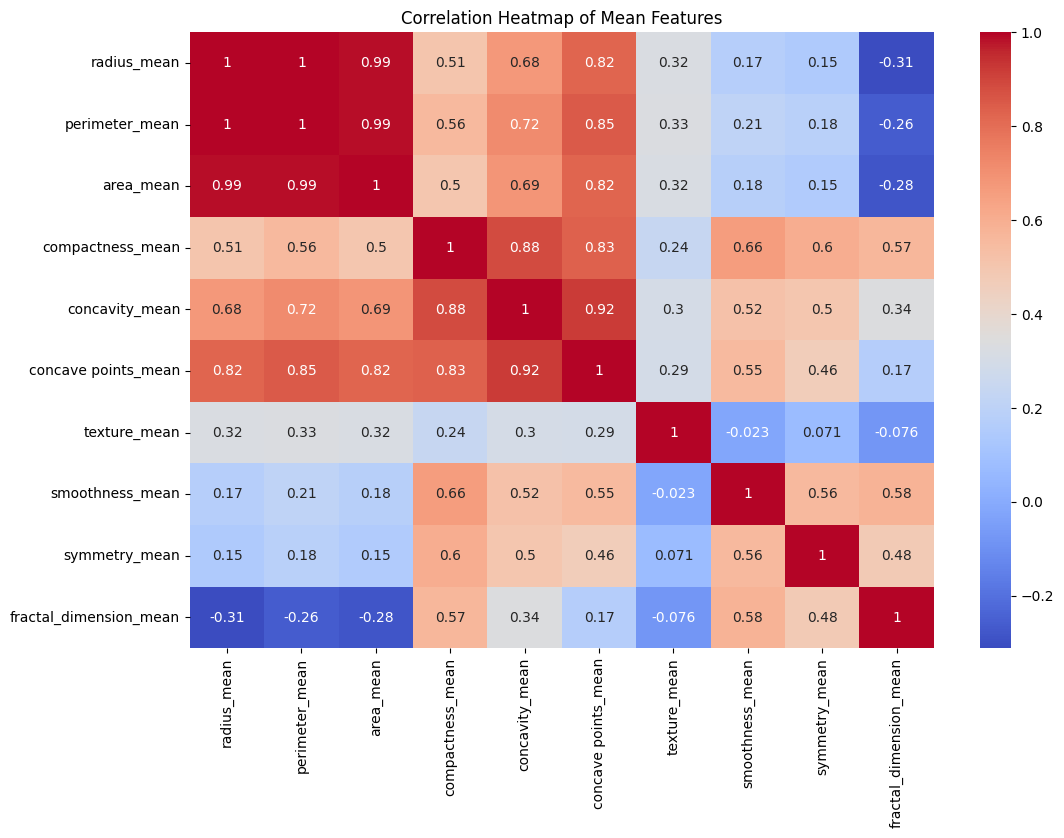

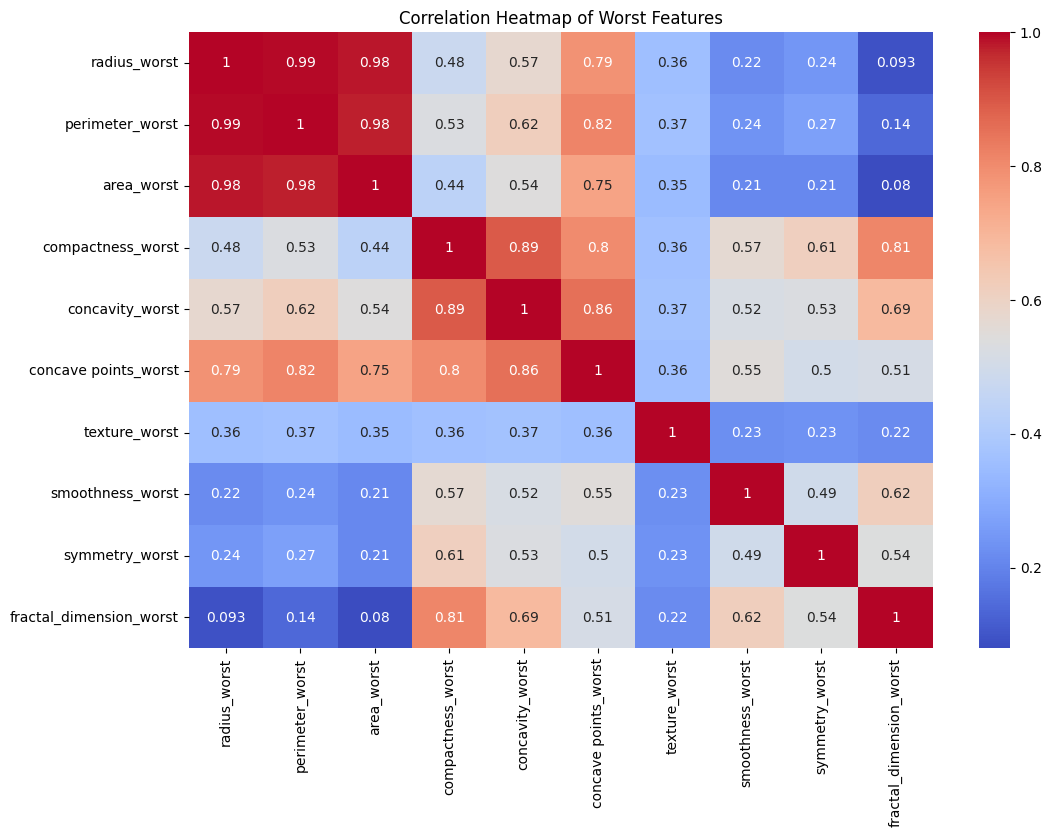

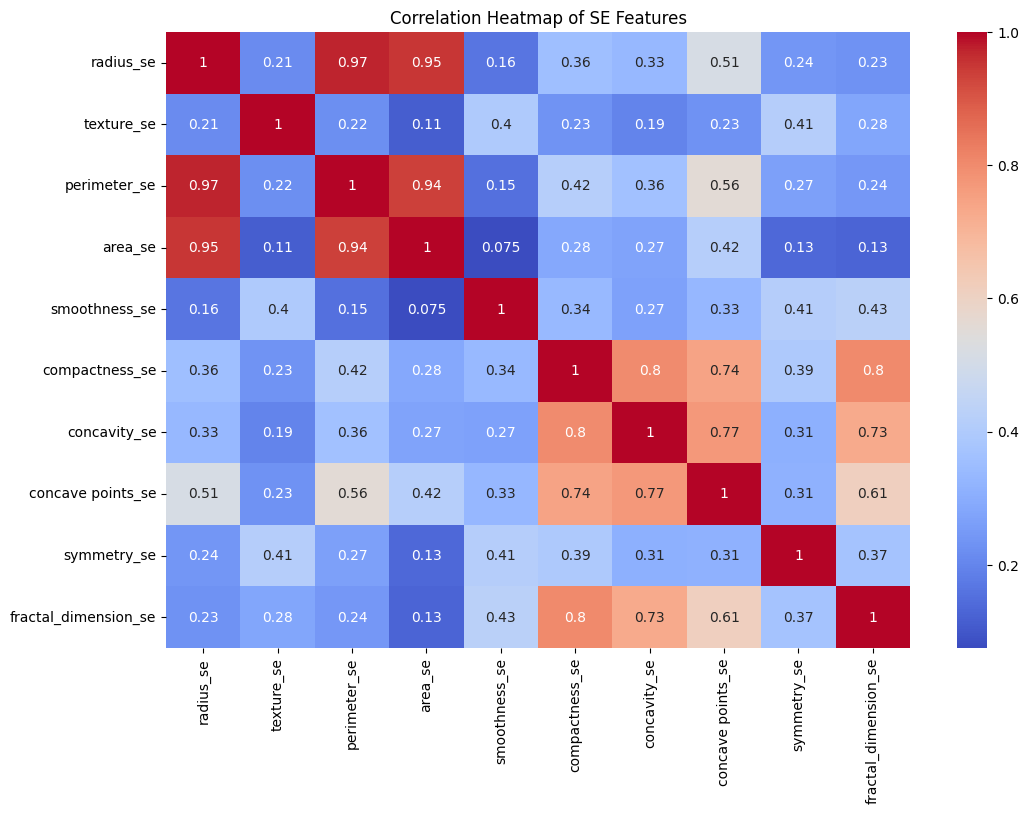

In [ ]:
features_mean = [
    'radius_mean', 'perimeter_mean', 'area_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean'
]
features_worst = [
    'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
features_se =  [
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

corr = df_num.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap of all Features')
sns.heatmap(corr, cmap='coolwarm', annot=False,)


corr = df[features_mean].corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap of Mean Features')
sns.heatmap(corr, cmap='coolwarm', annot=True,)


corr = df[features_worst].corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap of Worst Features')
sns.heatmap(corr, cmap='coolwarm', annot=True,)


corr = df[features_se].corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap of SE Features')
sns.heatmap(corr, cmap='coolwarm', annot=True,)




In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Accuracy: 0.9069

Confusion Matrix:
[[340  17]
 [ 36 176]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.95      0.93       357
   Malignant       0.91      0.83      0.87       212

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



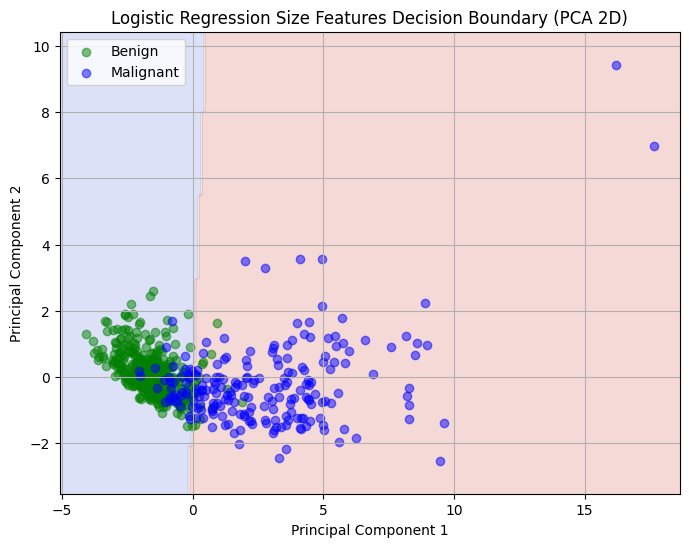

                      PC1       PC2
area_mean        0.347846  0.183004
area_worst       0.346962  0.148698
perimeter_worst  0.346042  0.210689
radius_worst     0.345383  0.230395
perimeter_mean   0.343180  0.251892


In [271]:
dfSize['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = dfSize.drop(columns=['diagnosis'])
y = dfSize['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clf = LogisticRegression()
clf.fit(X_pca, y)


y_pred = clf.predict(X_pca)

accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred, target_names=['Benign', 'Malignant'])

print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Size Features Decision Boundary (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

loadings = pd.DataFrame(np.abs(pca.components_), columns=X.columns, index=['PC1', 'PC2'])
print(loadings.T.sort_values(by='PC1', ascending=False).head())


Accuracy: 0.9086

Confusion Matrix:
[[336  21]
 [ 31 181]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.94      0.93       357
   Malignant       0.90      0.85      0.87       212

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.90       569
weighted avg       0.91      0.91      0.91       569



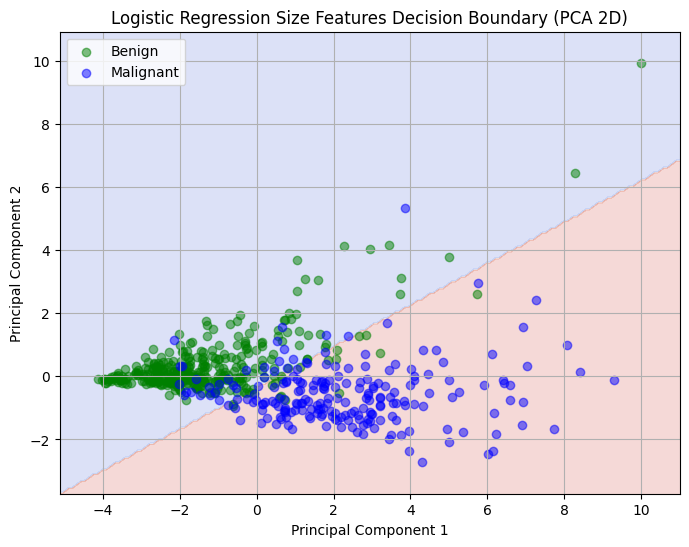

                           PC1       PC2
Concavity Mean        0.369492  0.092350
Compactness Mean      0.360499  0.116524
Concavity Worst       0.355039  0.146701
Concave Points Worst  0.342429  0.352400
Concave Points Mean   0.335217  0.308445


In [272]:
dfShape['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = dfShape.drop(columns=['diagnosis'])
y = dfShape['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clf = LogisticRegression()
clf.fit(X_pca, y)


y_pred = clf.predict(X_pca)

accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred, target_names=['Benign', 'Malignant'])

print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='green', label='Benign', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Malignant', alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Size Features Decision Boundary (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

loadings = pd.DataFrame(np.abs(pca.components_), columns=X.columns, index=['PC1', 'PC2'])
print(loadings.T.sort_values(by='PC1', ascending=False).head())
